In [0]:
#sort inorder of increasing distinct values
#remove last 10  columns in order of increasing distinct values
#scaling and normalization
#logistic regression 1 feature,2feature,....
#accuracy vs feature plot

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount("/gdrive")

In [0]:
sonar = pd.read_csv("/gdrive/My Drive/Sonar.csv")

In [6]:
sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [0]:
def sort_columns(columns):    
    sorted_cols = sorted(columns,key = lambda x:len(set((sonar[x].values))))
    return sorted_cols


In [0]:
sorted_cols = sort_columns(sonar.columns.values[:-1])

In [111]:
for col in sorted_cols:
    print(col,len(set(sonar[col].values)))

V60 109
V59 119
V57 121
V56 122
V58 124
V55 129
V53 134
V54 134
V52 144
V50 154
V51 160
V1 177
V4 181
V2 182
V3 190
V27 190
V5 193
V49 193
V26 194
V28 194
V7 195
V6 196
V44 196
V29 197
V13 198
V25 198
V23 199
V46 199
V21 200
V8 201
V24 201
V14 202
V17 202
V30 202
V47 202
V11 203
V15 203
V16 203
V20 203
V22 203
V18 204
V39 204
V41 204
V48 204
V9 205
V32 205
V33 205
V35 205
V36 205
V43 205


In [57]:
sonar.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'Class'], dtype=object)

In [0]:
#dropping last 10
def remove_last():
    global sorted_cols
    remove = sorted_cols[-10:]
    sorted_cols = sorted_cols[:-10]    
    sonar.drop(remove,axis=1,inplace=True)

In [0]:
remove_last()

In [60]:
sonar.columns.values

array(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V32', 'V33',
       'V35', 'V36', 'V39', 'V41', 'V43', 'V44', 'V46', 'V47', 'V48',
       'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57',
       'V58', 'V59', 'V60', 'Class'], dtype=object)

In [0]:
def normalize(x,mean,std):
    return abs((x-mean))/std

def normalize_all(columns):
    for col in columns:
        sonar[col] = sonar[col].apply(normalize,args=(sonar[col].mean(), sonar[col].std()))
 

In [0]:
normalize_all(sorted_cols)

In [0]:
def scale(x,_max):
    return x/_max

def scale_all(columns):
    for col in columns:
         sonar[col] = sonar[col].apply(scale,args=(sonar[col].max(),))

In [0]:
scale_all(sorted_cols)

In [70]:
sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V11,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.147429,0.119155,0.100063,0.082086,0.124573,0.161729,0.190950,0.194371,0.172203,0.204940,...,0.118755,0.198443,0.232866,0.147822,0.136115,0.157218,0.131005,0.156921,0.094094,0.466346
std,0.153398,0.119028,0.106961,0.093971,0.116106,0.137870,0.154552,0.176136,0.158759,0.169565,...,0.117988,0.150704,0.189955,0.134564,0.123413,0.137296,0.122319,0.149783,0.095949,0.500070
min,0.000592,0.000699,0.000886,0.000021,0.000007,0.000827,0.003371,0.000928,0.000204,0.000175,...,0.000351,0.003212,0.001685,0.003096,0.003901,0.000729,0.001360,0.001453,0.002481,0.000000
25%,0.058960,0.045602,0.041654,0.026489,0.049271,0.071905,0.081232,0.081280,0.066658,0.074195,...,0.048888,0.092225,0.104739,0.059442,0.055219,0.076232,0.062385,0.065159,0.034959,0.000000
50%,0.109658,0.100530,0.078224,0.068187,0.104981,0.132216,0.150506,0.148211,0.147095,0.166203,...,0.090818,0.177058,0.191680,0.122576,0.113861,0.134401,0.105380,0.117715,0.081567,0.000000
75%,0.181487,0.144587,0.121179,0.098031,0.162374,0.218810,0.269543,0.237971,0.232274,0.291972,...,0.153708,0.268077,0.324243,0.188943,0.180306,0.194359,0.162977,0.198230,0.117863,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
def split(X,y,test_size):
    n = len(y)
    ntest = int(test_size*n)
    ntrain = n-ntest
    indices = np.random.choice(n,n)
    trainx,testx,trainy,testy = X.loc[indices[:ntrain],:],X.loc[indices[ntrain:],:],\
                                y.loc[indices[:ntrain]],y.loc[indices[ntrain:]]
    return (trainx.values,testx.values,trainy.values,testy.values)

In [0]:
def train():
    accuracies = []
    for i in range(1,len(sorted_cols)+1):
        logreg = LogisticRegression()
        trainx,testx,trainy,testy = split(sonar.loc[:,sorted_cols[:i]],sonar.loc[:,"Class"],0.2)
        logreg.fit(trainx,trainy)
        acc = logreg.score(testx,testy)
        print(f"no. of features{len(sorted_cols[:i])}: {acc}")
        accuracies.append(acc)
    return accuracies

In [0]:
trainx[:,:i]

In [108]:
accuracies = train()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

no. of features1: 0.5365853658536586
no. of features2: 0.5365853658536586
no. of features3: 0.4878048780487805
no. of features4: 0.5609756097560976
no. of features5: 0.5365853658536586
no. of features6: 0.5609756097560976
no. of features7: 0.6585365853658537
no. of features8: 0.6585365853658537
no. of features9: 0.5609756097560976
no. of features10: 0.6585365853658537
no. of features11: 0.4878048780487805
no. of features12: 0.6097560975609756
no. of features13: 0.5609756097560976
no. of features14: 0.6585365853658537
no. of features15: 0.6097560975609756
no. of features16: 0.6341463414634146
no. of features17: 0.5853658536585366
no. of features18: 0.5853658536585366
no. of features19: 0.5853658536585366
no. of features20: 0.6585365853658537
no. of features21: 0.6097560975609756
no. of features22: 0.5853658536585366
no. of features23: 0.4878048780487805
no. of features24: 0.6097560975609756
no. of features25: 0.6829268292682927
no. of features26: 0.8048780487804879
no. of features27: 0.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Text(0, 0.5, 'accuracy')

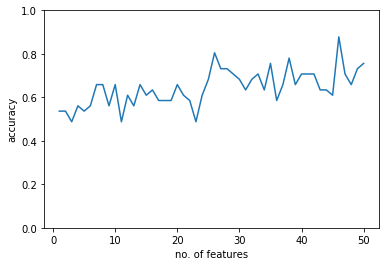

In [112]:
plt.plot(range(1,51), accuracies)
plt.xlabel('no. of features')
plt.ylim(0, 1)
plt.ylabel('accuracy')